In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
from matplotlib import pyplot as plt

import dynchro

In [2]:
%run -i 0_functions.py

# 1. Read in data

In [3]:
# Read in the data, with backup URLs provided
adata_Rep1 = sc.read(
    "../data/human_cd34_bm_rep1.h5ad",
    backup_url="https://s3.amazonaws.com/dp-lab-data-public/palantir/human_cd34_bm_rep1.h5ad",
)
adata_Rep2 = sc.read(
    "../data/human_cd34_bm_rep2.h5ad",
    backup_url="https://s3.amazonaws.com/dp-lab-data-public/palantir/human_cd34_bm_rep2.h5ad",
)
adata_Rep3 = sc.read(
    "../data/human_cd34_bm_rep3.h5ad",
    backup_url="https://s3.amazonaws.com/dp-lab-data-public/palantir/human_cd34_bm_rep3.h5ad",
)

In [4]:
adata_Rep1.obsm["X_tsne"] = adata_Rep1.obsm["tsne"]
adata_Rep2.obsm["X_tsne"] = adata_Rep2.obsm["tsne"]
adata_Rep3.obsm["X_tsne"] = adata_Rep3.obsm["tsne"]

In [5]:
adata_Rep1, adata_Rep2, adata_Rep3

(AnnData object with n_obs × n_vars = 5780 × 14651
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential'
     uns: 'cluster_colors', 'ct_colors', 'palantir_branch_probs_cell_types'
     obsm: 'tsne', 'MAGIC_imputed_data', 'palantir_branch_probs', 'X_tsne',
 AnnData object with n_obs × n_vars = 6501 × 14913
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential'
     uns: 'cluster_colors', 'ct_colors', 'palantir_branch_probs_cell_types'
     obsm: 'tsne', 'MAGIC_imputed_data', 'palantir_branch_probs', 'X_tsne',
 AnnData object with n_obs × n_vars = 12046 × 14044
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential'
     uns: 'cluster_colors', 'ct_colors', 'palantir_branch_probs_cell_types'
     obsm: 'tsne', 'MAGIC_imputed_data', 'palantir_branch_probs', 'X_tsne')

In [6]:
adata_Rep1.write_h5ad("data/adata_Rep1.h5ad")
adata_Rep2.write_h5ad("data/adata_Rep2.h5ad")
adata_Rep3.write_h5ad("data/adata_Rep3.h5ad")

# 2. Determine branches

In [8]:
def probabilities(adata):
    branches = adata.uns["palantir_branch_probs_cell_types"]
    all_probabilities = adata.obsm["palantir_branch_probs"]

    probabilities = {}

    for ix, branch in enumerate(branches):
        prob = all_probabilities[:, ix]

        value = [prob[i] if prob[i] == max(all_probabilities[i, :]) else 0 for i in range(len(prob))]
        probabilities[branch] = value

    return probabilities

def plot_branches(adata):
    probs = probabilities(adata)

    x = adata.obsm["X_tsne"][:, 0]
    y = adata.obsm["X_tsne"][:, 1]
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i, (key, value) in enumerate(probs.items()):
        ax = axs[i // 3, i % 3]
        ax.scatter(x, y, c=value, cmap="Reds", s=5)
        ax.set_title(key)

In [9]:
def add_mapping(mapping, model):
    rev_mapping = {}
    for k, v in mapping.items():
        for i in v:
            rev_mapping[i] = k

    model.obs["cell_type"] = [rev_mapping[int(i)] for i in model.obs["clusters"]]

## 2.1 Rep 1

In [10]:
mapping_Rep1 = {
    "Mono": [3, 6],
    "CLP": [5],
    "DC": [7],
    "HSC": [0, 1, 4],
    "Ery": [2, 8],
    "Mega": [9]
}

add_mapping(mapping_Rep1, adata_Rep1)

adata_Rep1.obs

clusters  palantir_pseudotime  palantir_diff_potential  \
index                                                                         
Run4_120703408880541        2             0.528063                 0.294430   
Run4_120703409056541        0             0.071683                 1.418632   
Run4_120703409580963        3             0.748991                 0.279959   
Run4_120703423990708        3             0.712743                 0.296824   
Run4_120703424252854        4             0.514219                 1.250914   
...                       ...                  ...                      ...   
Run5_241114589051630        8             0.803283                 0.007726   
Run5_241114589051819        1             0.386990                 1.331768   
Run5_241114589128940        4             0.451526                 1.374819   
Run5_241114589357942        8             0.842049                 0.002953   
Run5_241114589841822        4             0.458466                 1.320618   

                     cell_type  
index                           
Run4_120703408880541       Ery  
Run4_120703409056541       HSC  
Run4_120703409580963      Mono  
Run4_120703423990708      Mono  
Run4_120703424252854       HSC  
...                        ...  
Run5_241114589051630       Ery  
Run5_241114589051819       HSC  
Run5_241114589128940       HSC  
Run5_241114589357942       Ery  
Run5_241114589841822       HSC  

[5780 rows x 4 columns]

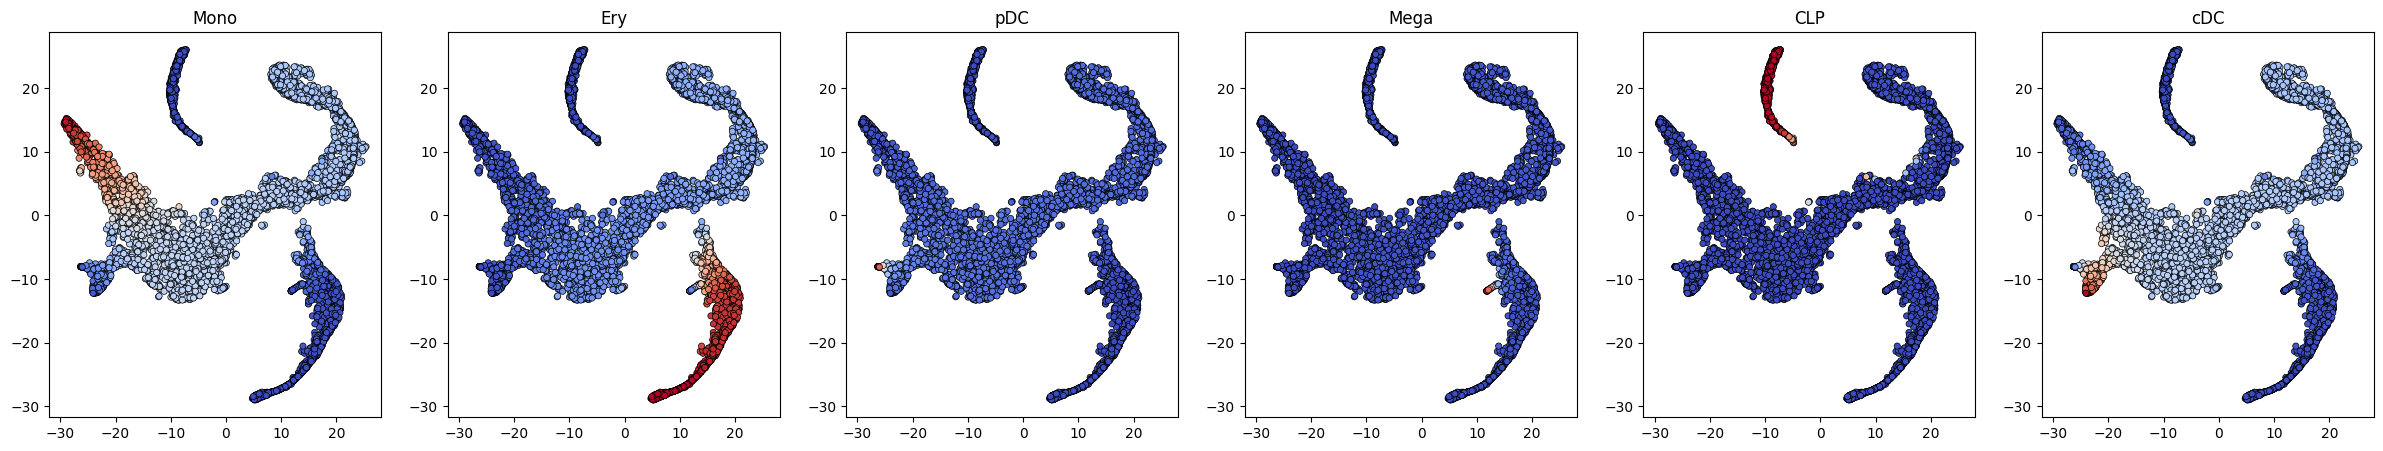

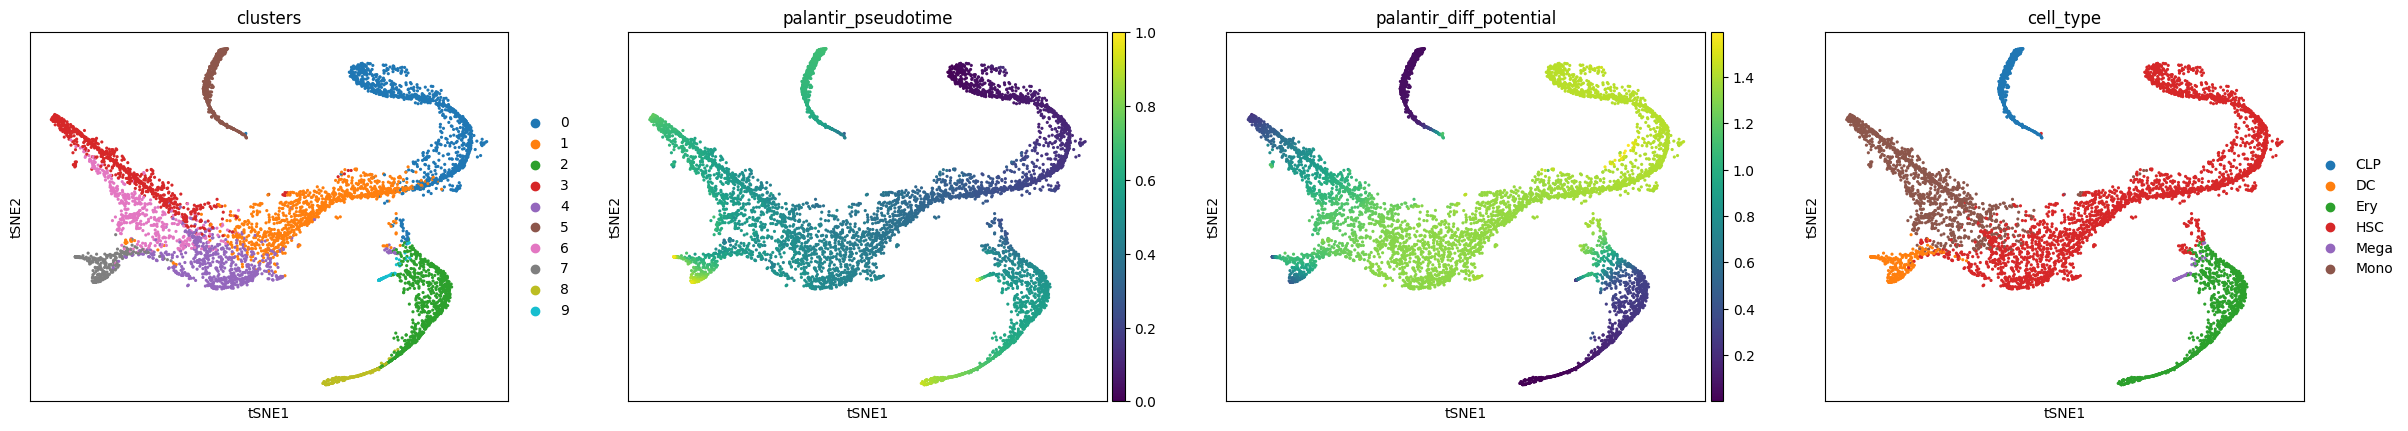

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 6)
fig.set_size_inches(30, 5)

for i in range(6):
    title = adata_Rep1.uns["palantir_branch_probs_cell_types"][i]
    color = adata_Rep1.obsm["palantir_branch_probs"][:, i]
    x = adata_Rep1.obsm["X_tsne"][:, 0]
    y = adata_Rep1.obsm["X_tsne"][:, 1]
    axs[i].scatter(x, y, c=color, cmap="coolwarm", s = 20, linewidths = .5, edgecolors = "black")
    axs[i].set_title(title)

sc.pl.tsne(adata_Rep1, color=["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])

plt.show()

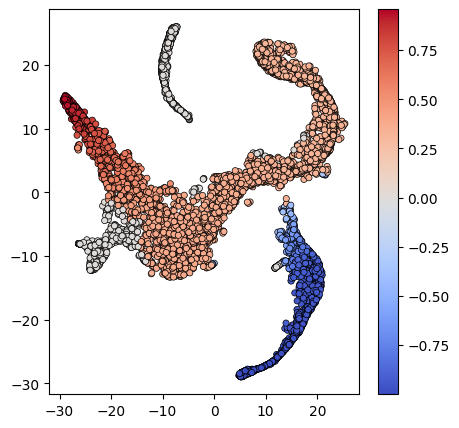

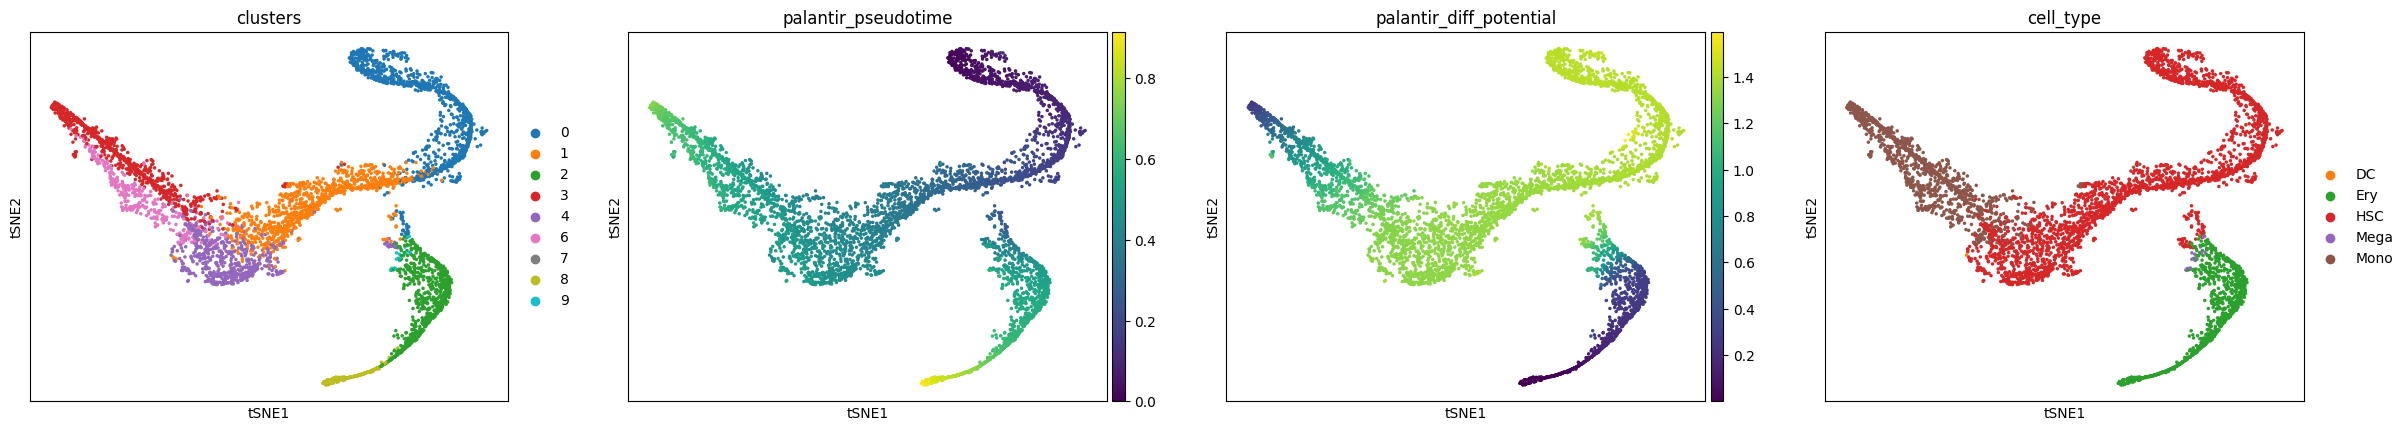

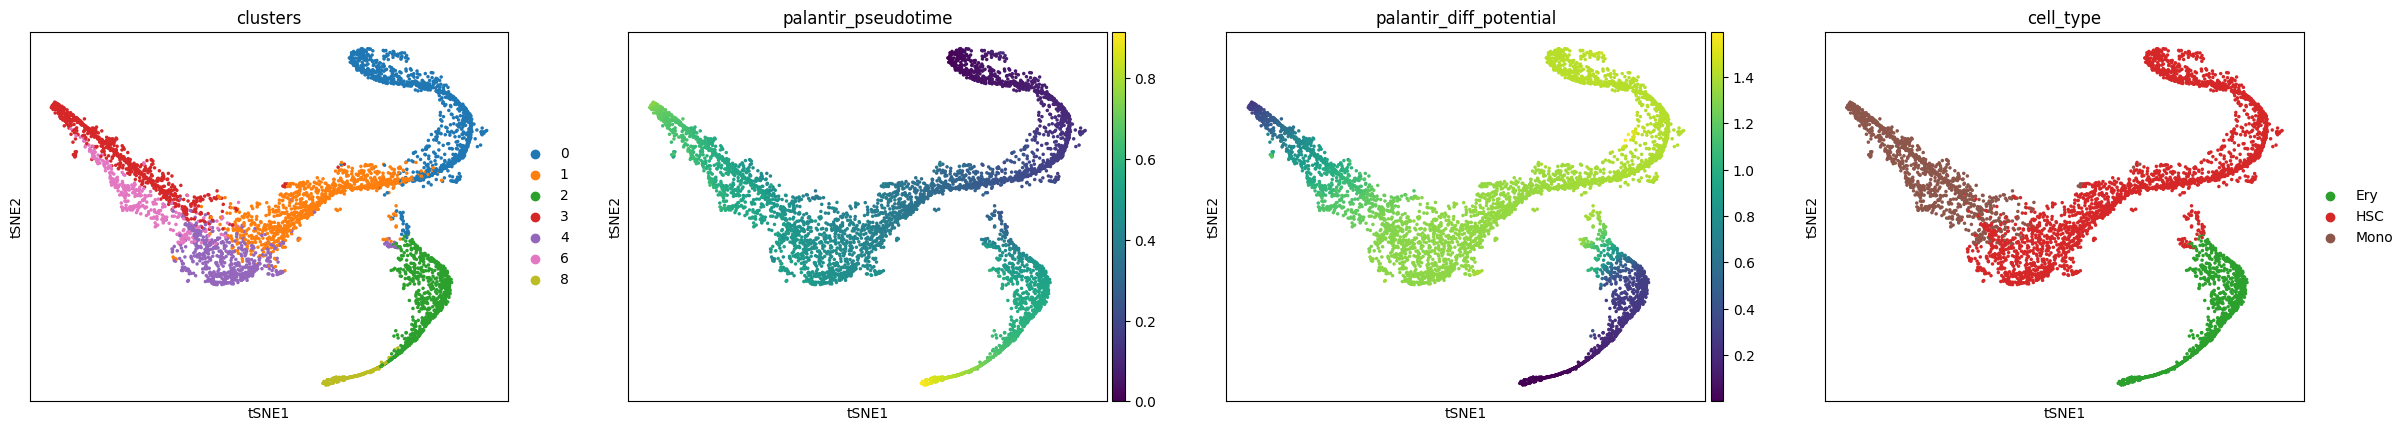

In [12]:
# disambiguate mono and ery and common cells
probs = probabilities(adata_Rep1)
monoprobs = probs["Mono"]
eryprobs = probs["Ery"]

diff = [monoprobs[i] - eryprobs[i] for i in range(len(monoprobs))]
x = adata_Rep1.obsm["X_tsne"][:, 0]
y = adata_Rep1.obsm["X_tsne"][:, 1]
# plot

plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=diff, cmap="coolwarm", s = 20, linewidths = .5, edgecolors = "black")
plt.colorbar()
plt.show()

mask_mono = (np.array(monoprobs) > np.array(eryprobs) ) & ( np.array(monoprobs) > 0)
mask_ery = (np.array(eryprobs) > np.array(monoprobs) ) & ( np.array(eryprobs) > 0)
mask = mask_mono | mask_ery
mono_ery = adata_Rep1[mask]

sc.pl.tsne(mono_ery, color = ["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])

# mono is 0, 1, 3, 4, 6
# ery is 0, 2, 8
mono_ery_Rep1 = mono_ery[mono_ery.obs["clusters"].isin(["0", "1", "2", "3", "4", "6", "8"])]
sc.pl.tsne(mono_ery_Rep1, color = ["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])

mono_ery_Rep1.write_h5ad("data/rep1_mono_ery.h5ad")

## 2.2 Rep 2

In [13]:
mapping_Rep2 = {
    "Mono": [3, 4],
    "CLP": [7],
    "DC": [5, 8],
    "HSC": [0,1],
    "Ery": [2, 6],
    "Mega": [9]
}

add_mapping(mapping_Rep2, adata_Rep2)

adata_Rep2.obs

clusters  palantir_pseudotime  palantir_diff_potential  \
index                                                                         
Run1_120703409151260        0             0.111099                 1.554974   
Run1_120703409665908        2             0.456458                 0.765090   
Run1_120703423794532        0             0.018614                 1.582979   
Run1_120703455541980        1             0.455399                 1.543326   
Run1_120726943062812        2             0.453506                 0.597368   
...                       ...                  ...                      ...   
Run3_241106421238491        0             0.144553                 1.580640   
Run3_241106421476651        2             0.651538                 0.319971   
Run3_241106421500699        4             0.414507                 1.218321   
Run3_241114577061739        3             0.569496                 1.418064   
Run3_241114589125542        1             0.267381                 1.572249   

                     cell_type  
index                           
Run1_120703409151260       HSC  
Run1_120703409665908       Ery  
Run1_120703423794532       HSC  
Run1_120703455541980       HSC  
Run1_120726943062812       Ery  
...                        ...  
Run3_241106421238491       HSC  
Run3_241106421476651       Ery  
Run3_241106421500699      Mono  
Run3_241114577061739      Mono  
Run3_241114589125542       HSC  

[6501 rows x 4 columns]

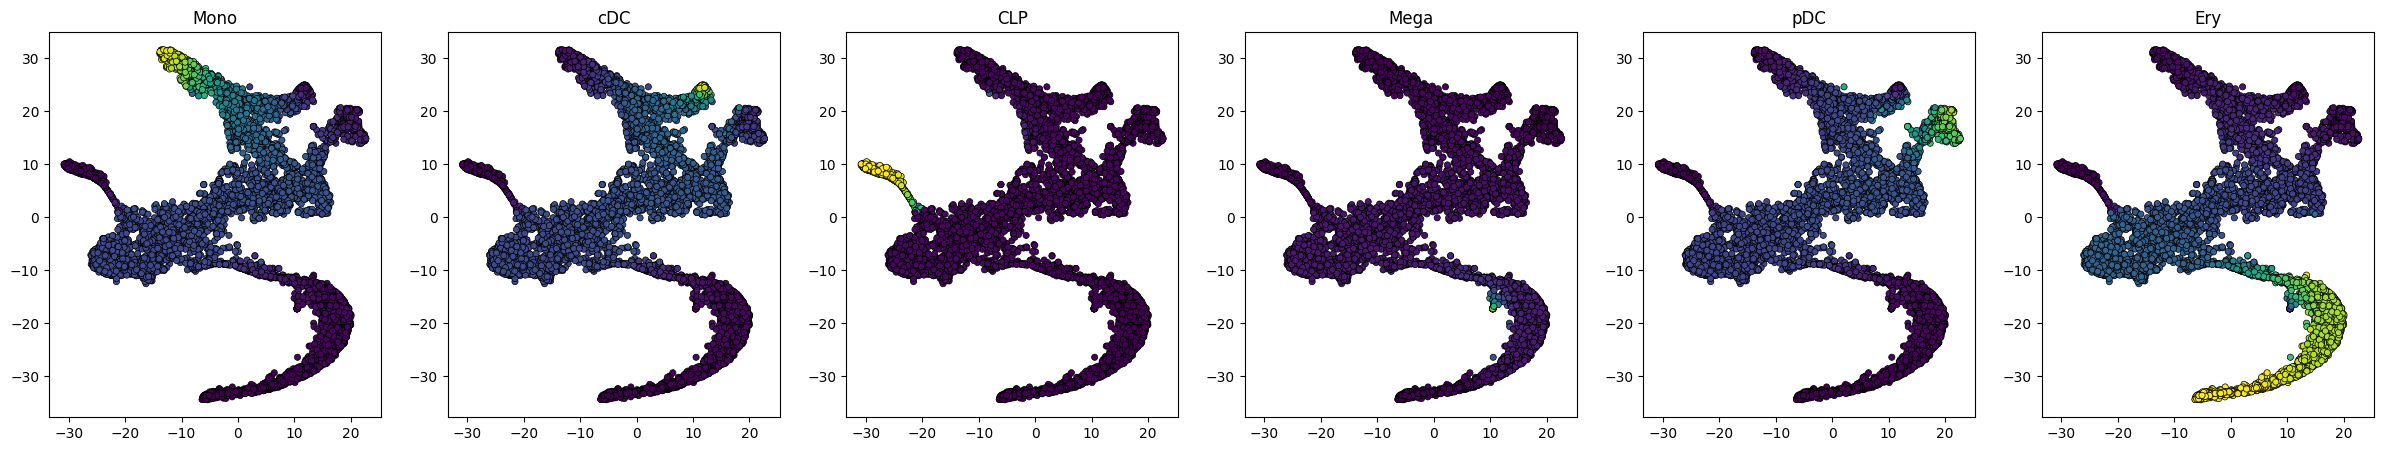

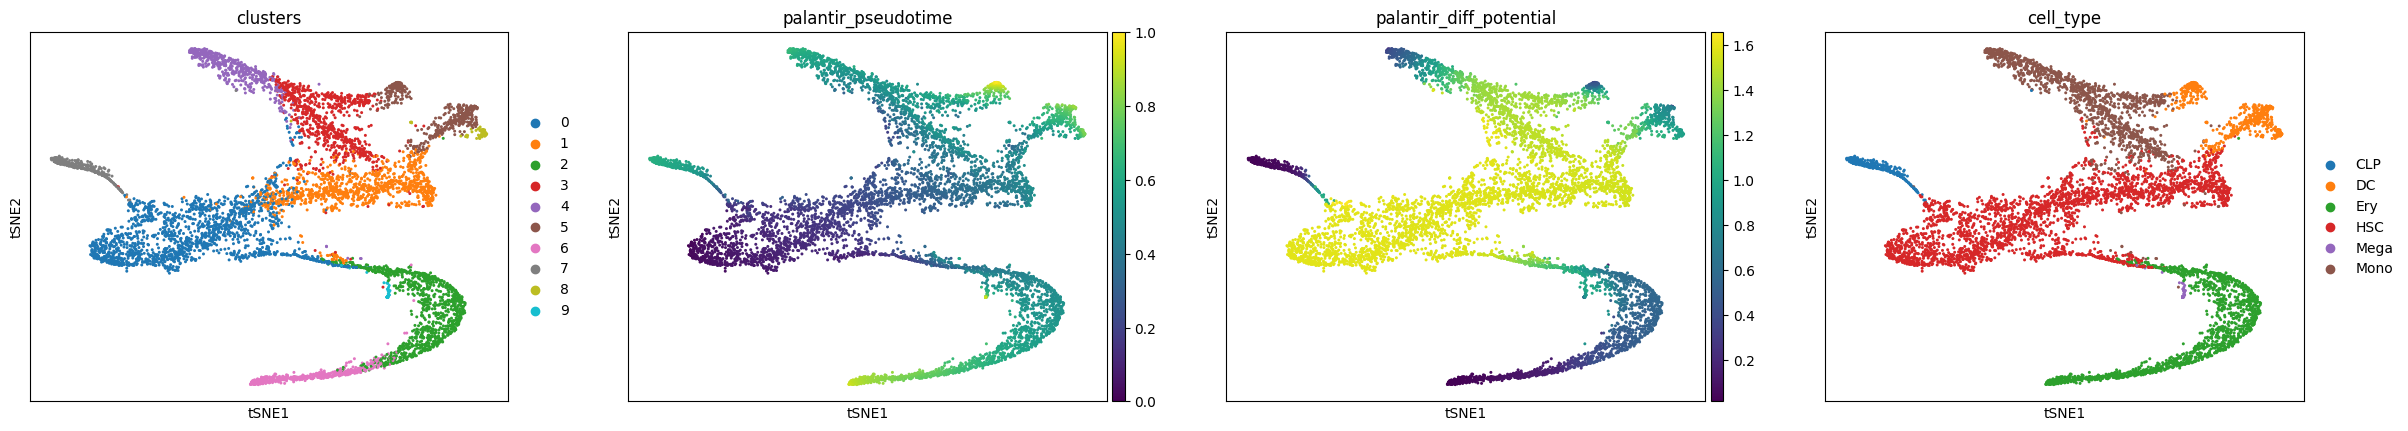

In [14]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(30, 5)

for i in range(6):
    title = adata_Rep2.uns["palantir_branch_probs_cell_types"][i]
    color = adata_Rep2.obsm["palantir_branch_probs"][:, i]
    x = adata_Rep2.obsm["X_tsne"][:, 0]
    y = adata_Rep2.obsm["X_tsne"][:, 1]
    axs[i].scatter(x, y, c=color, cmap="viridis", s = 20, linewidths = .5, edgecolors = "black")
    axs[i].set_title(title)

sc.pl.tsne(adata_Rep2, color=["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])

plt.show()

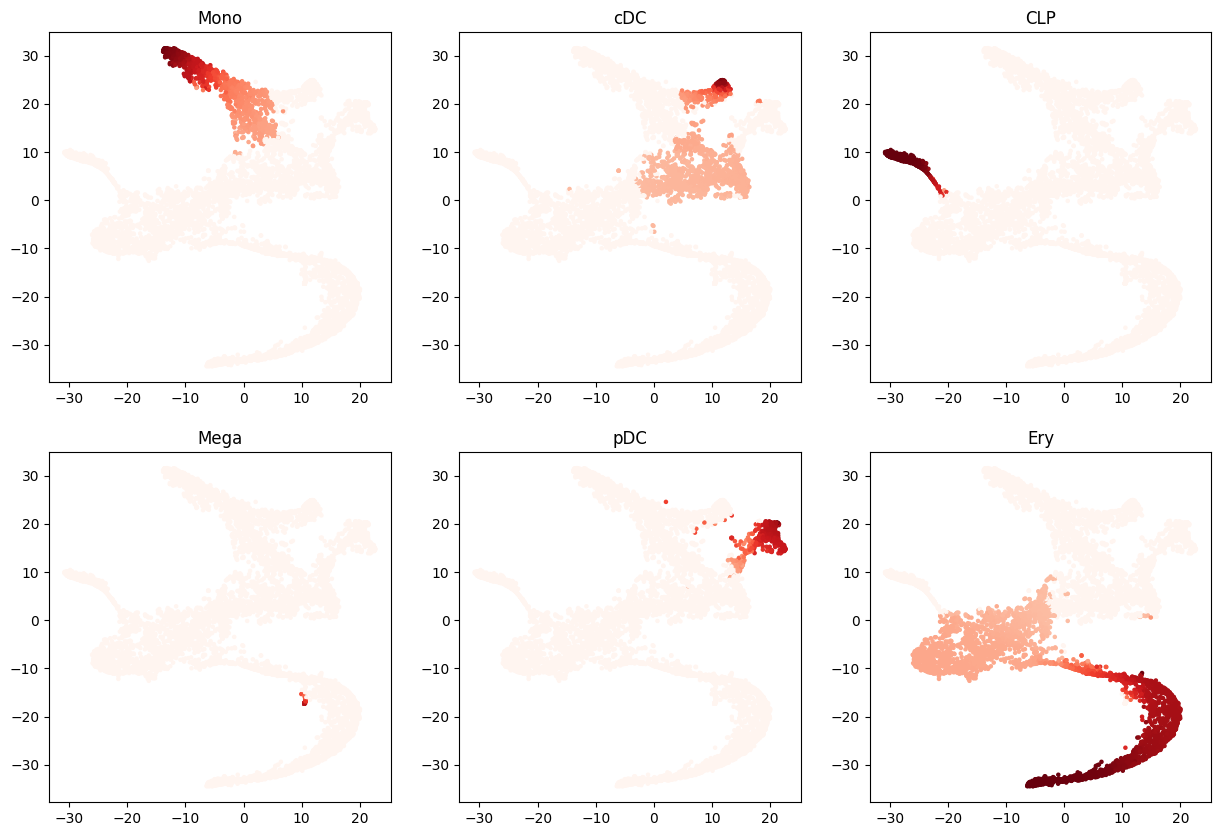

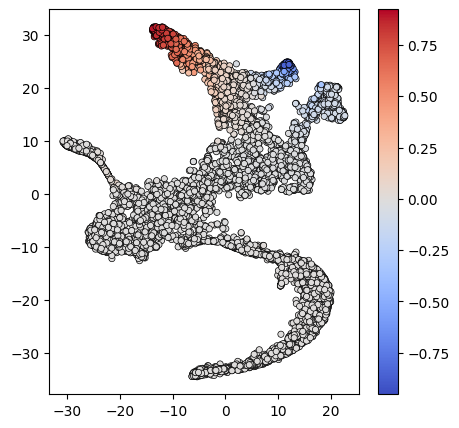

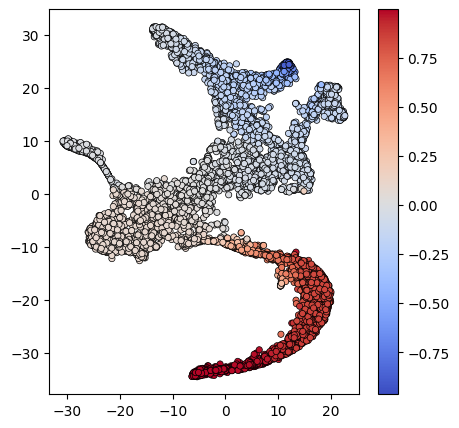

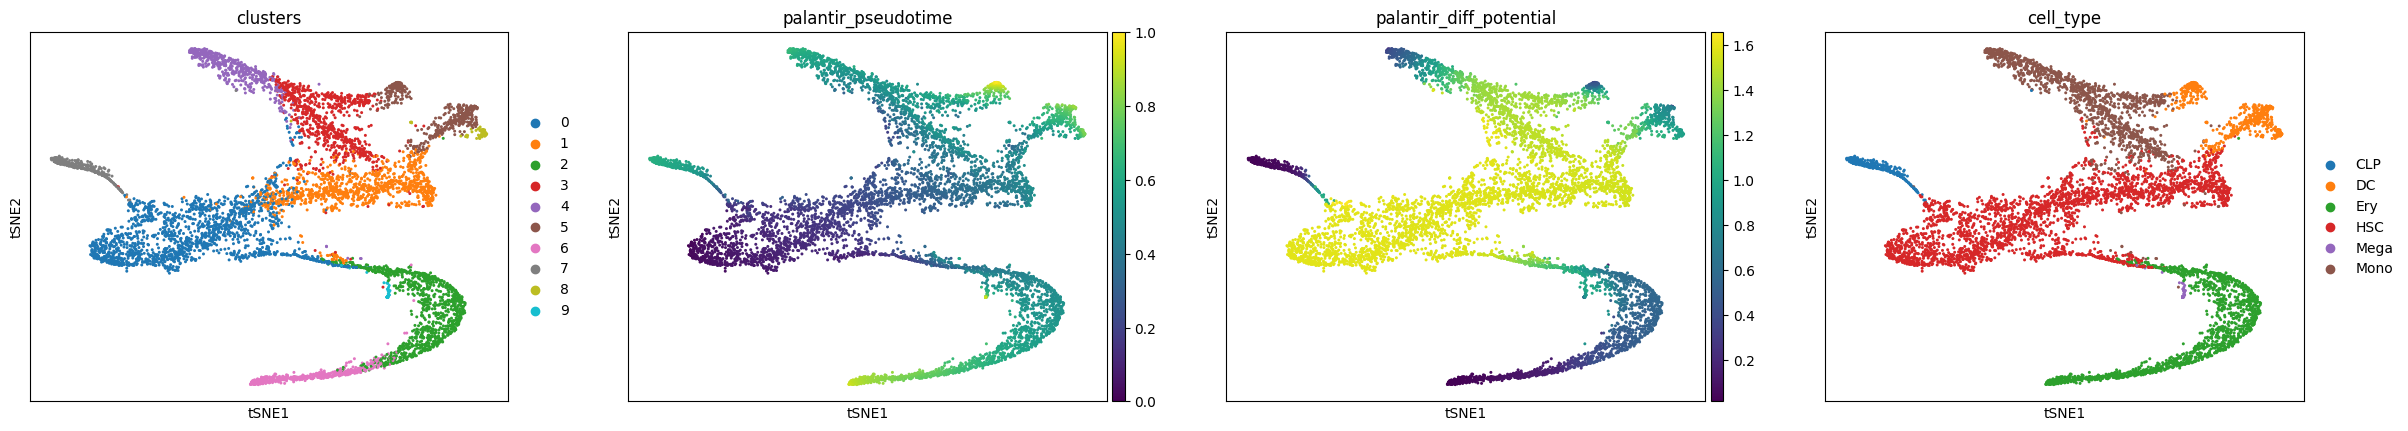

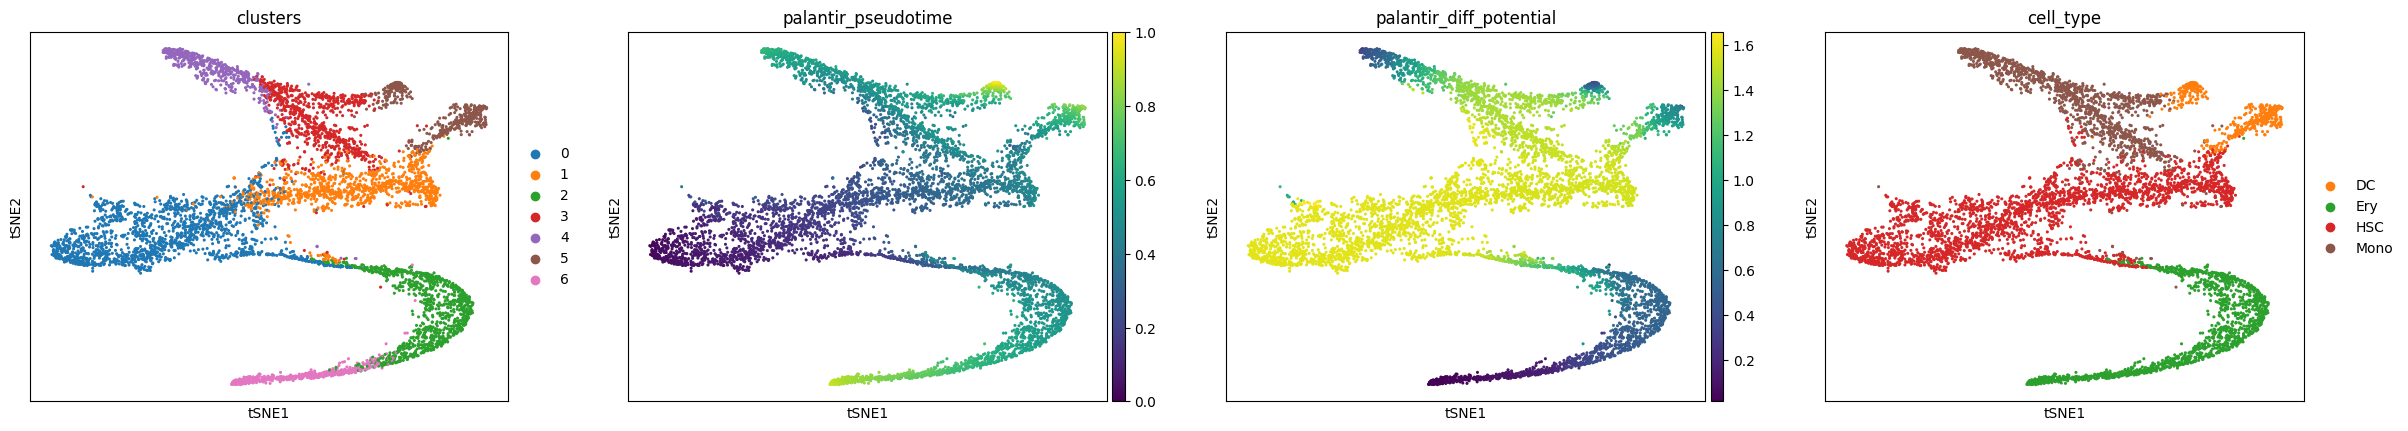

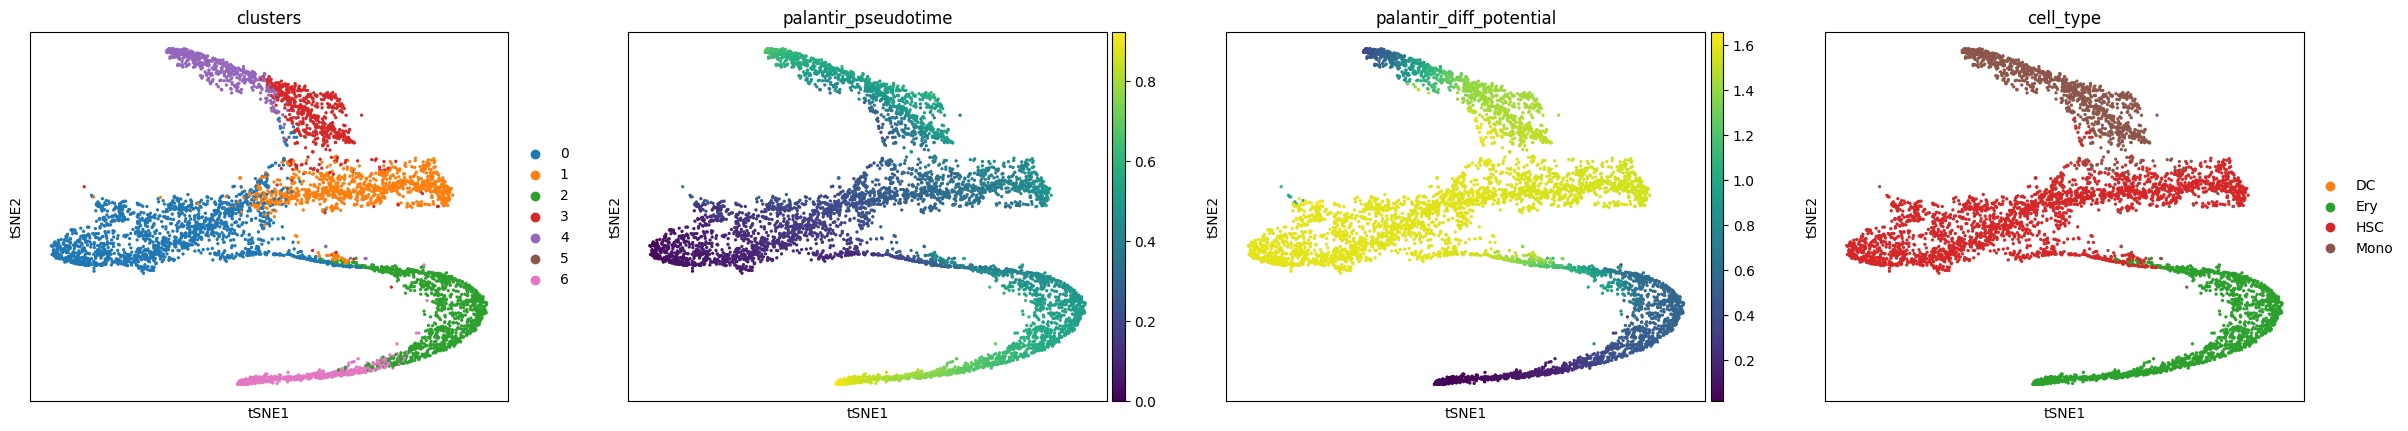

In [15]:
# disambiguate mono and ery and common cells in Rep2
plot_branches(adata_Rep2)
probs2 = probabilities(adata_Rep2)

monoprobs = adata_Rep2.obsm["palantir_branch_probs"][:, 0]
cDcprobs = adata_Rep2.obsm["palantir_branch_probs"][:, 1]
eryprobs = adata_Rep2.obsm["palantir_branch_probs"][:, 5]

x = adata_Rep2.obsm["X_tsne"][:, 0]
y = adata_Rep2.obsm["X_tsne"][:, 1]

mono_cdc = monoprobs - cDcprobs
ery_cdc = eryprobs - cDcprobs

# more mono
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=mono_cdc, cmap="coolwarm", s = 20, linewidths = .5, edgecolors = "black")
plt.colorbar()
plt.show()

# more ery
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=ery_cdc, cmap="coolwarm", s = 20, linewidths = .5, edgecolors = "black")
plt.colorbar()
plt.show()

sc.pl.tsne(adata_Rep2, color = ["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])

# select the mono, cdc and ery cells, and then have an error margin for the common ones
keep = ["4", "3", "1", "5", "0", "2", "6"]
mono_ery_cdc = adata_Rep2[adata_Rep2.obs["clusters"].isin(keep)]

sc.pl.tsne(mono_ery_cdc, color = ["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])


monoprobs = mono_ery_cdc.obsm["palantir_branch_probs"][:, 0]
cDcprobs = mono_ery_cdc.obsm["palantir_branch_probs"][:, 1]
eryprobs = mono_ery_cdc.obsm["palantir_branch_probs"][:, 5]

probs2 = probabilities(mono_ery_cdc)
pDcprobs = probs2["pDC"]

mono_cdc = monoprobs - cDcprobs
ery_cdc = eryprobs - cDcprobs

mask_mono = (np.array(monoprobs) > np.array(cDcprobs) ) & ( np.array(monoprobs) > 0)
mask_ery = (np.array(eryprobs) > np.array(cDcprobs) ) & ( np.array(eryprobs) > 0)
mask_pdc = (np.array(pDcprobs) > 0)

maks_rest = (mono_cdc > -0.1) & (ery_cdc > -0.1) 
mask = (mask_mono | mask_ery | maks_rest)
mask = mask & ~mask_pdc

final_mono_ery_rep2 = mono_ery_cdc[mask]

sc.pl.tsne(final_mono_ery_rep2, color = ["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])

final_mono_ery_rep2.write_h5ad("data/rep2_mono_ery.h5ad")

## 2.3 Rep 3

In [16]:
mapping_Rep3 = {
    "Mono": [3,7],
    "CLP": [0],
    "DC": [9,4],
    "HSC": [2,1,6],
    "Ery": [5],
    "Mega": [8]
}

add_mapping(mapping_Rep3, adata_Rep3)

adata_Rep3.obs

clusters  palantir_pseudotime  palantir_diff_potential  \
index                                                                         
Run1_120703409605350        6             0.376909                 1.395921   
Run1_120703423995174        0             0.496634                 0.164828   
Run1_120726896982380        0             0.531917                 0.125505   
Run1_120726897485621        4             0.610955                 1.153430   
Run1_120726912350059        2             0.078194                 1.712830   
...                       ...                  ...                      ...   
Run4_241114589845732        2             0.035205                 1.735317   
Run4_241114589915956        4             0.688505                 0.811938   
Run4_241114607996339        2             0.198628                 1.648749   
Run4_241114608228189        1             0.308515                 1.422590   
Run4_241114608516468        1             0.225024                 1.548205   

                     cell_type  
index                           
Run1_120703409605350       HSC  
Run1_120703423995174       CLP  
Run1_120726896982380       CLP  
Run1_120726897485621        DC  
Run1_120726912350059       HSC  
...                        ...  
Run4_241114589845732       HSC  
Run4_241114589915956        DC  
Run4_241114607996339       HSC  
Run4_241114608228189       HSC  
Run4_241114608516468       HSC  

[12046 rows x 4 columns]

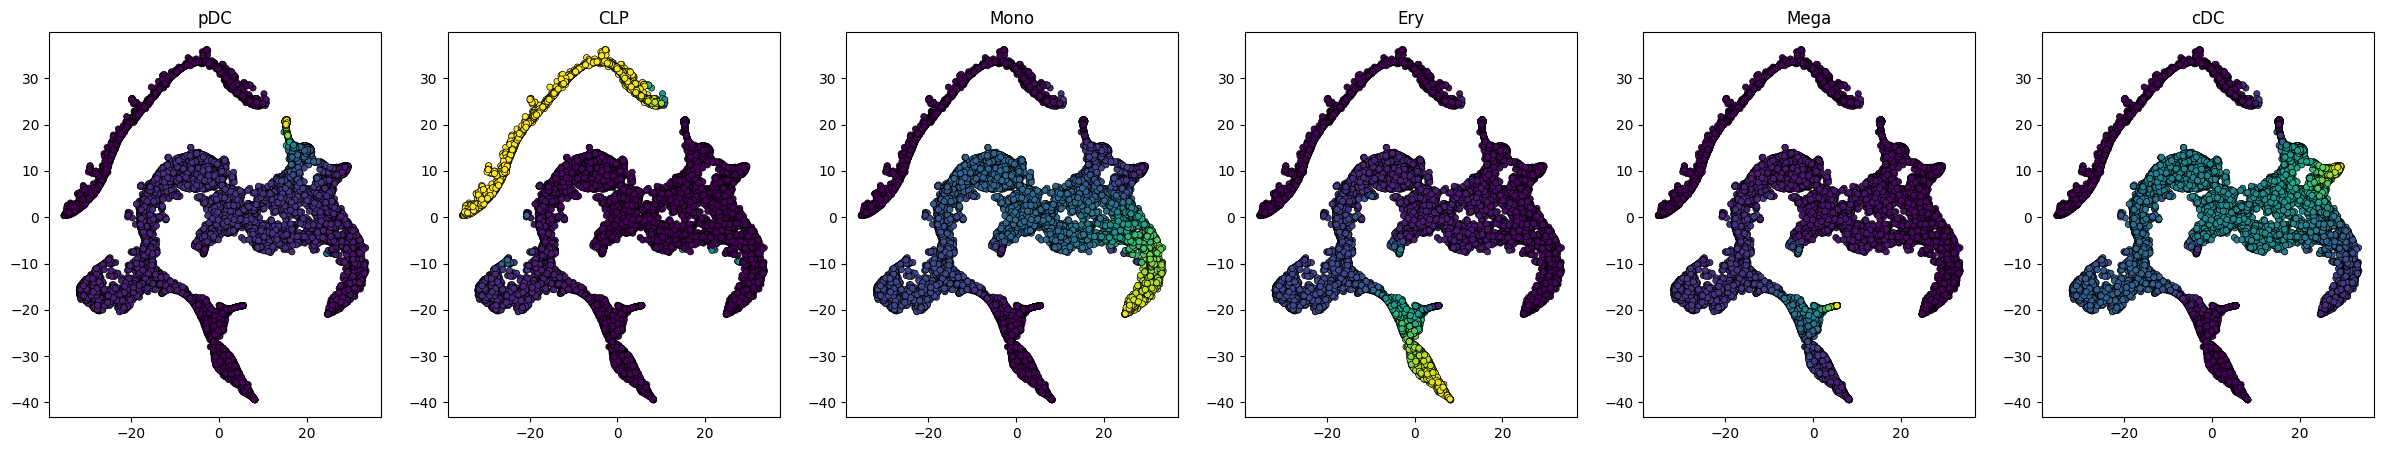

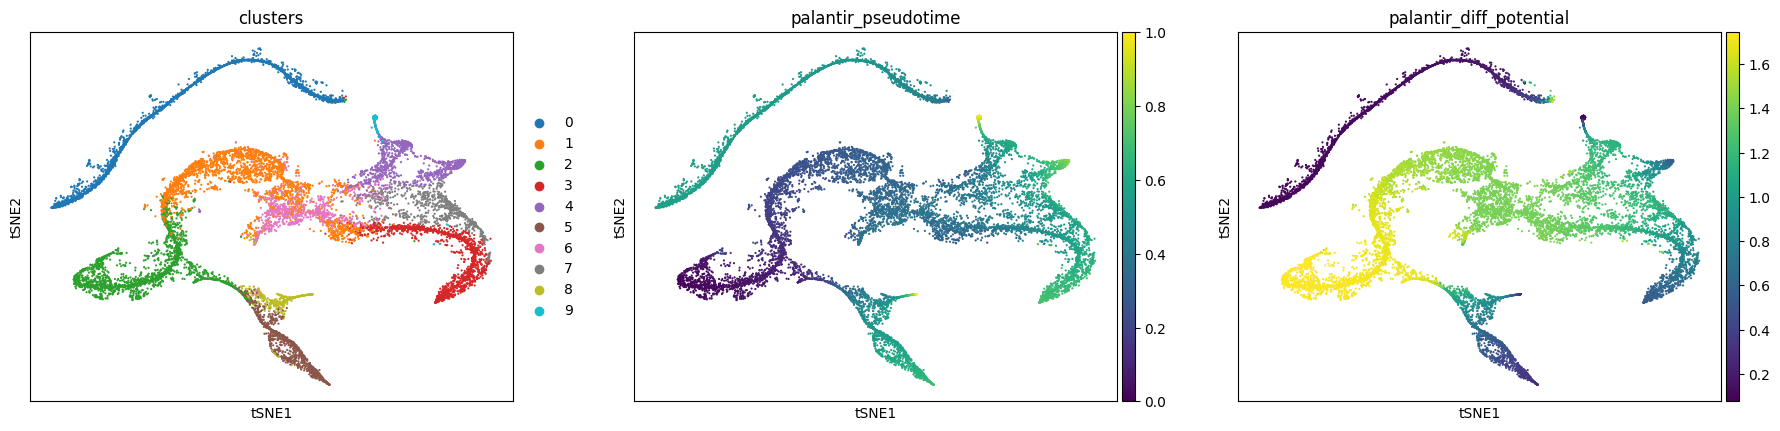

In [17]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(30, 5)

for i in range(6):
    title = adata_Rep3.uns["palantir_branch_probs_cell_types"][i]
    color = adata_Rep3.obsm["palantir_branch_probs"][:, i]
    x = adata_Rep3.obsm["X_tsne"][:, 0]
    y = adata_Rep3.obsm["X_tsne"][:, 1]
    axs[i].scatter(x, y, c=color, cmap="viridis", s = 20, linewidths = .5, edgecolors = "black")
    axs[i].set_title(title)

sc.pl.tsne(adata_Rep3, color=["clusters", "palantir_pseudotime", "palantir_diff_potential"])
plt.show()

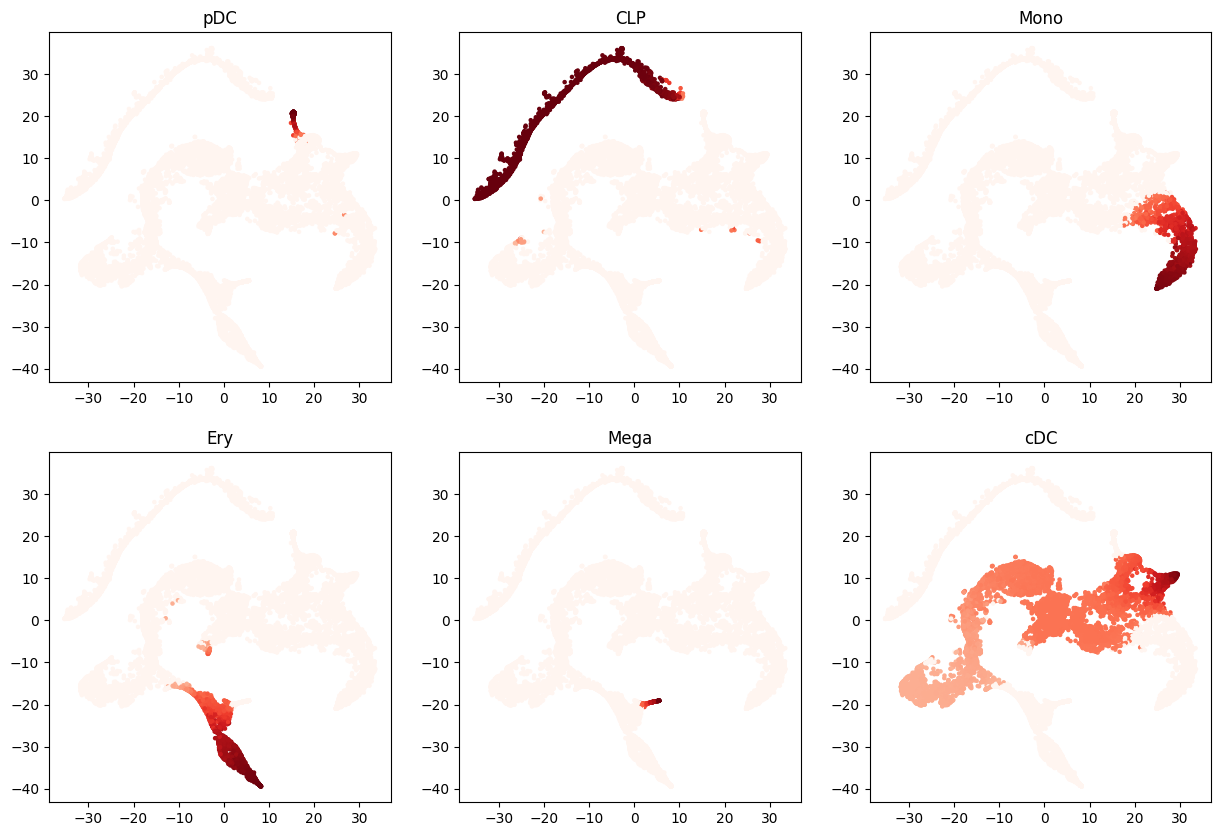

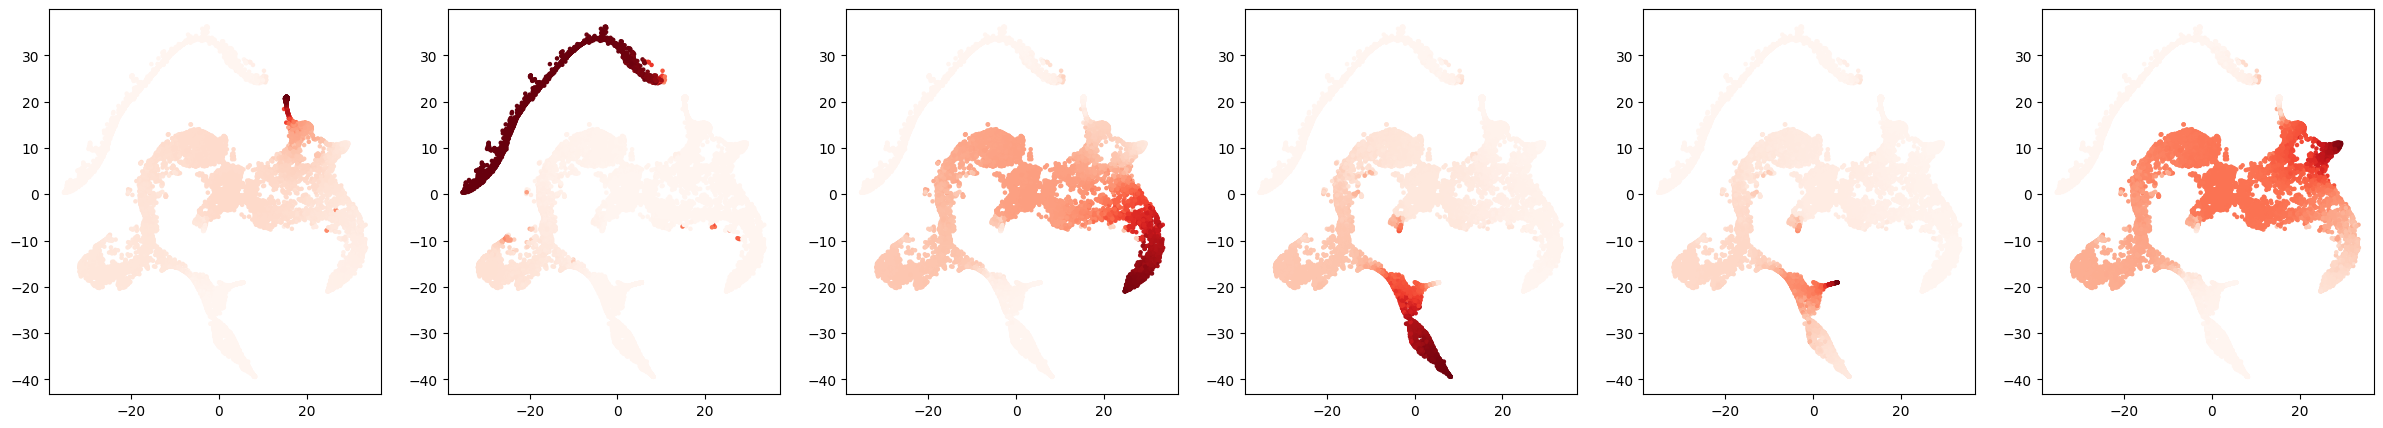

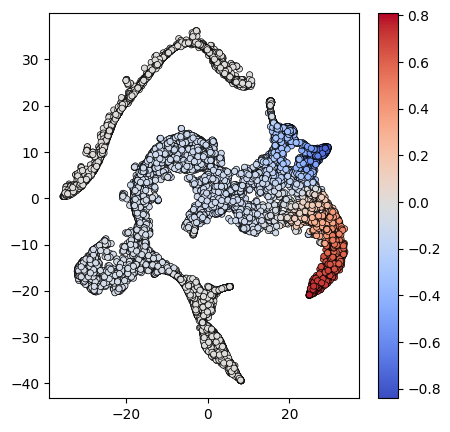

/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/scanpy/plotting/_utils.py:481: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


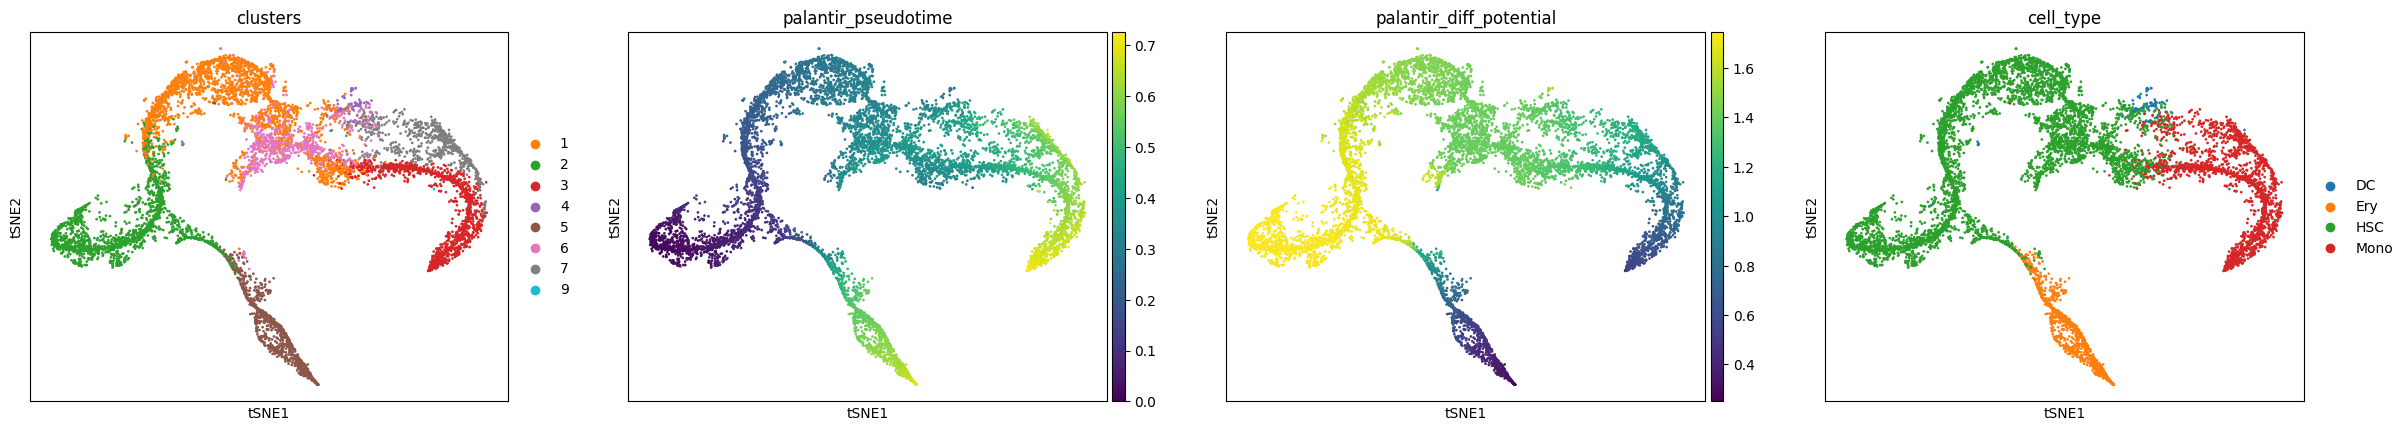

In [18]:
# disambiguate mono and ery and common cells in Rep2
plot_branches(adata_Rep3)
probs3 = probabilities(adata_Rep3)

fig, axs = plt.subplots(1, 6)
fig.set_size_inches(30, 5)

probs = adata_Rep3.obsm["palantir_branch_probs"]
for i in range(probs.shape[1]):
    tovis = probs[:, i]
    x = adata_Rep3.obsm["X_tsne"][:, 0]
    y = adata_Rep3.obsm["X_tsne"][:, 1]
    axs[i].scatter(x, y, c=tovis, cmap="Reds", s = 5)

# ery branch is just the ery things
# mono branch also has the cdc problem, so check the difference between mono and cdc

monoprobs = adata_Rep3.obsm["palantir_branch_probs"][:, 2]
cDcprobs = adata_Rep3.obsm["palantir_branch_probs"][:, 5]
eryprobs = np.array(probs3["Ery"]) #adata_Rep3.obsm["palantir_branch_probs"][:, 3]
pdcprobs = np.array(probs3["pDC"])
clpprobs = np.array(probs3["CLP"])
megaprobs = np.array(probs3["Mega"])

mono_cdc = monoprobs - cDcprobs

x = adata_Rep3.obsm["X_tsne"][:, 0]
y = adata_Rep3.obsm["X_tsne"][:, 1]

plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=mono_cdc, cmap="coolwarm", s = 20, linewidths = .5, edgecolors = "black")
plt.colorbar()
plt.show()

mask = ((mono_cdc > -0.2) | (eryprobs > 0)) & ~((clpprobs > 0) | (pdcprobs > 0) | (megaprobs > 0))  # (monoprobs > 0)
final_mono_Rep3 = adata_Rep3[mask]
# remove mega
final_mono_Rep3 = final_mono_Rep3[final_mono_Rep3.obs["clusters"] != "8"]

# only keep relevant clusters
keep = ["2", "1", "6", "7", "9", "5", "1", "6"]

sc.pl.tsne(final_mono_Rep3, color = ["clusters", "palantir_pseudotime", "palantir_diff_potential", "cell_type"])
final_mono_Rep3.write_h5ad("data/rep3_mono_ery.h5ad")

# 3. Split branches

In [19]:
rep1 = ad.read_h5ad("data/rep1_mono_ery.h5ad")
rep2 = ad.read_h5ad("data/rep2_mono_ery.h5ad")
rep3 = ad.read_h5ad("data/rep3_mono_ery.h5ad")

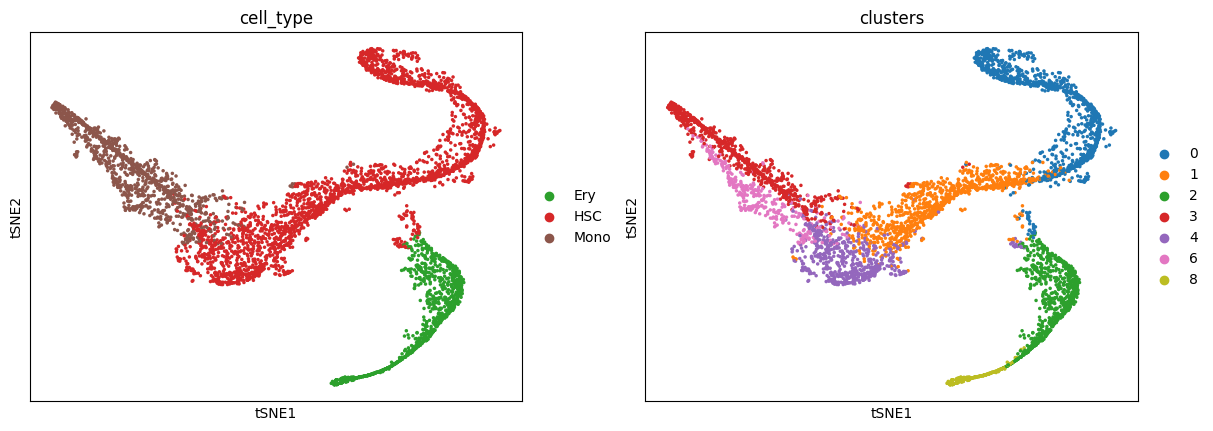

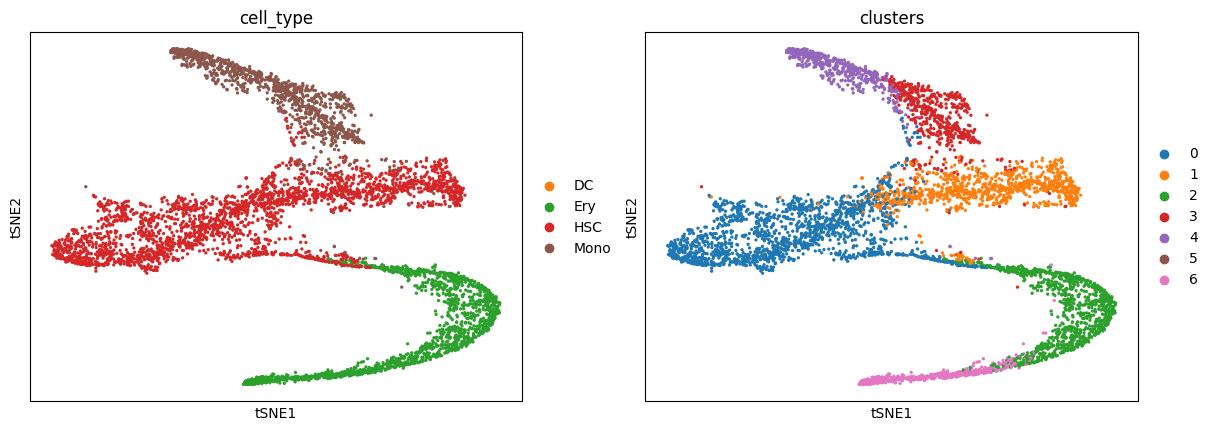

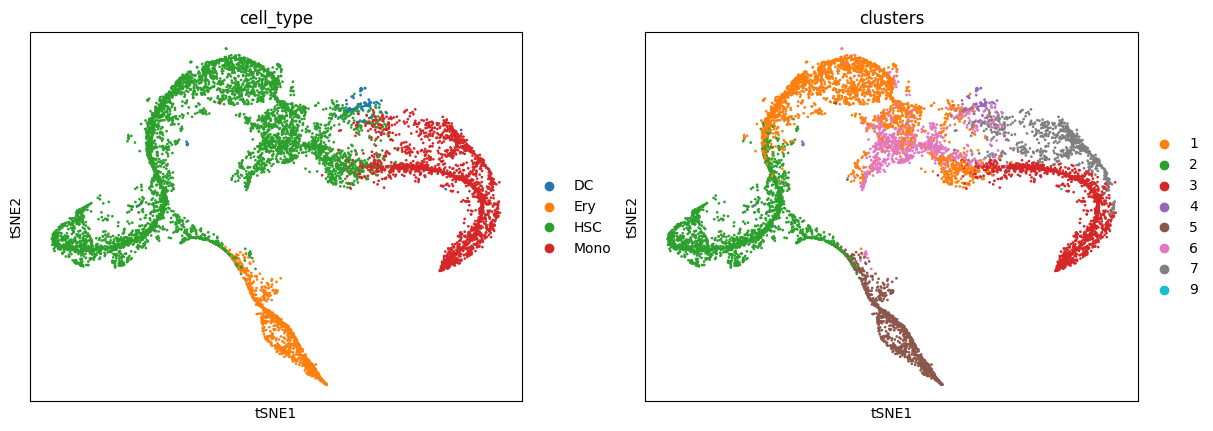

In [20]:
sc.pl.tsne(rep1, color = ["cell_type", "clusters"])
sc.pl.tsne(rep2, color = ["cell_type", "clusters"])
sc.pl.tsne(rep3, color = ["cell_type", "clusters"])

In [21]:
# prep, label lineages
rep1.uns["id"] = f"Mono & Ery branch, Rep1"
rep2.uns["id"] = f"Mono & Ery branch, Rep2"
rep3.uns["id"] = f"Mono & Ery branch, Rep3"

In [22]:
def label_lineages(adata, lineage_name, lineage_clusters):
    adata.obs["milestones"] = adata.obs["clusters"]
    adata.obs["pseudotime"] = adata.obs["palantir_pseudotime"]
    adata.uns["lineage_labels"] = []

    dynchro.pp.label_lineage(adata, "milestones", lineage_clusters, lineage_name)
    dynchro.pp.calculate_pseudocells(adata, 100, lineage_name)
    return adata

def split_dataset(adata, keep):
    acopy = adata.copy()
    acopy = acopy[acopy.obs["clusters"].isin(keep)]
    return acopy

/tmp/ipykernel_50925/1776331841.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["milestones"] = adata.obs["clusters"]
/home/louise/Work/dynchro/src/dynchro/pp/pseudocells.py:53: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"transition_matrix_{amount}"] = np.array(
/tmp/ipykernel_50925/1776331841.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["milestones"] = adata.obs["clusters"]
/home/louise/Work/dynchro/src/dynchro/pp/pseudocells.py:53: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"transition_matrix_{amount}"] = np.array(
/tmp/ipykernel_50925/1776331841.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["milestones"] = adata.obs["clusters"]

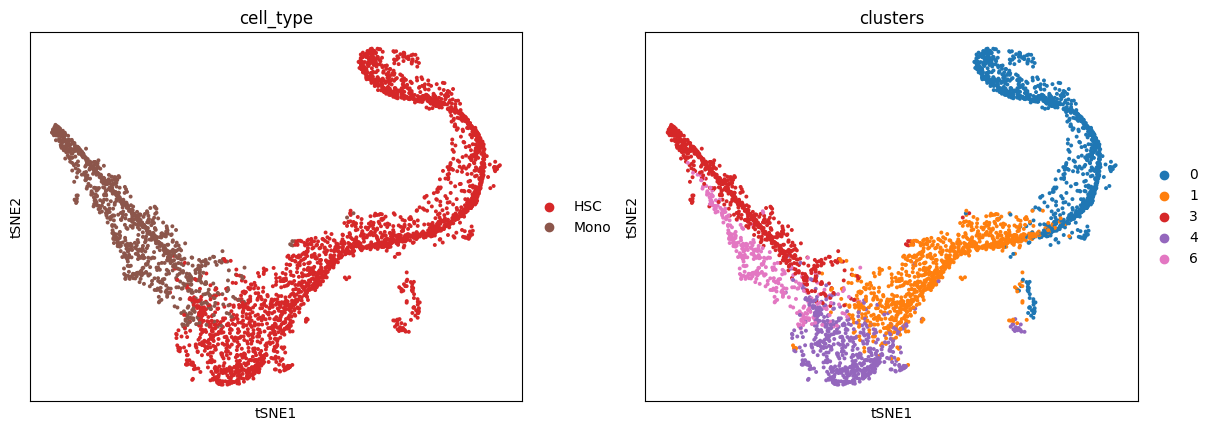

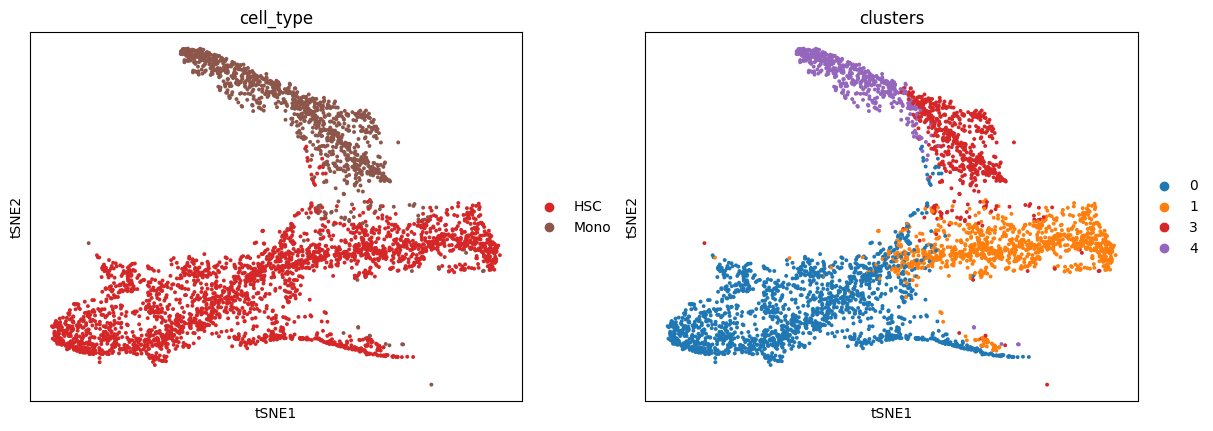

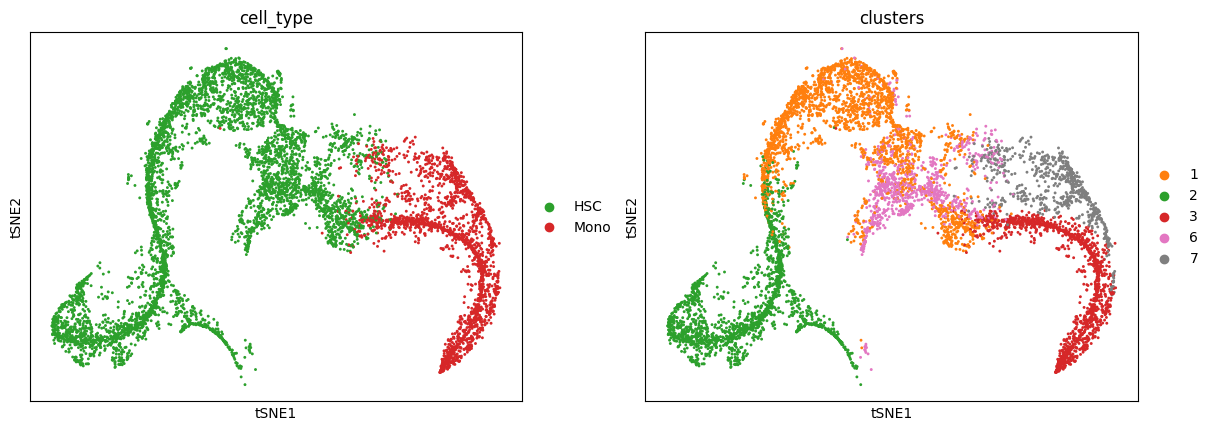

In [23]:
rep1_mono_clusters = ["0", "1", "3", "4", "6"]
rep2_mono_clusters = ["0", "1", "3", "4"]
rep3_mono_clusters = ['2', '1', '6', '7', '3']

rep1_mono = split_dataset(rep1, rep1_mono_clusters)
rep1_mono = label_lineages(rep1_mono, "Mono", rep1_mono_clusters)
rep1_mono.uns["id"] = "Mono branch, Rep1"

rep2_mono = split_dataset(rep2, rep2_mono_clusters)
rep2_mono = label_lineages(rep2_mono, "Mono", rep2_mono_clusters)
rep2_mono.uns["id"] = "Mono branch, Rep2"

rep3_mono = split_dataset(rep3, rep3_mono_clusters)
rep3_mono = label_lineages(rep3_mono, "Mono", rep3_mono_clusters)
rep3_mono.uns["id"] = "Mono branch, Rep3"

sc.pl.tsne(rep1_mono, color = ["cell_type", "clusters"])
sc.pl.tsne(rep2_mono, color = ["cell_type", "clusters"])
sc.pl.tsne(rep3_mono, color = ["cell_type", "clusters"])

/tmp/ipykernel_50925/1776331841.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["milestones"] = adata.obs["clusters"]
/home/louise/Work/dynchro/src/dynchro/pp/pseudocells.py:53: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"transition_matrix_{amount}"] = np.array(
/tmp/ipykernel_50925/1776331841.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["milestones"] = adata.obs["clusters"]
/home/louise/Work/dynchro/src/dynchro/pp/pseudocells.py:53: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"transition_matrix_{amount}"] = np.array(
/tmp/ipykernel_50925/1776331841.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["milestones"] = adata.obs["clusters"]

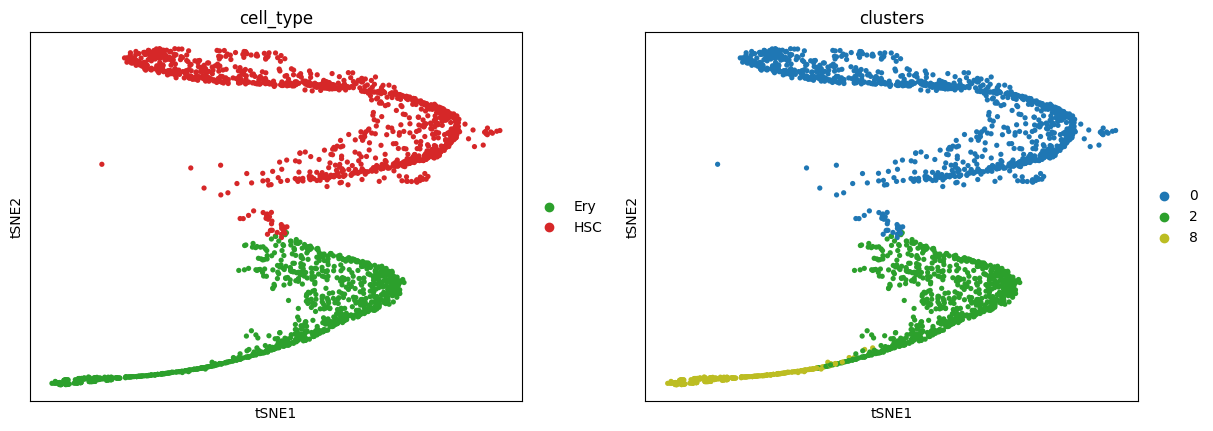

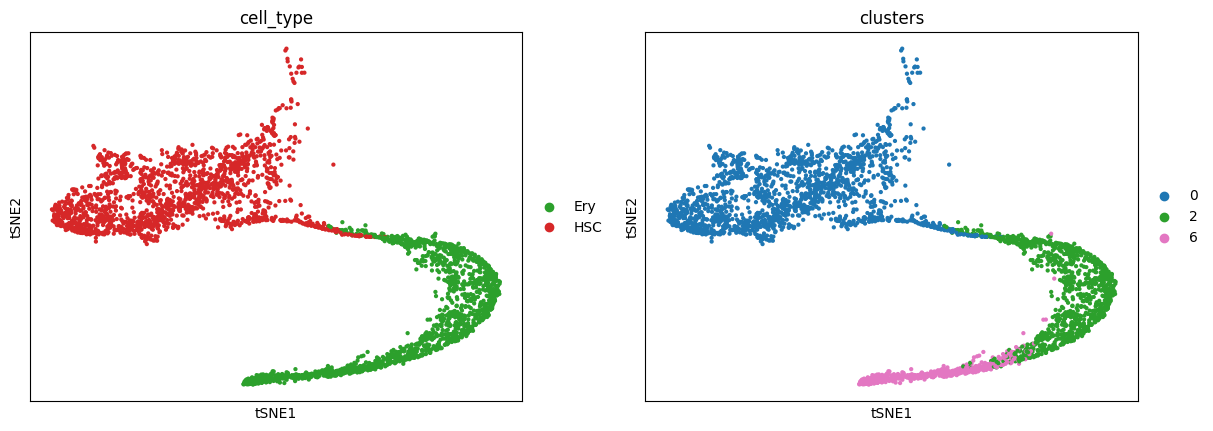

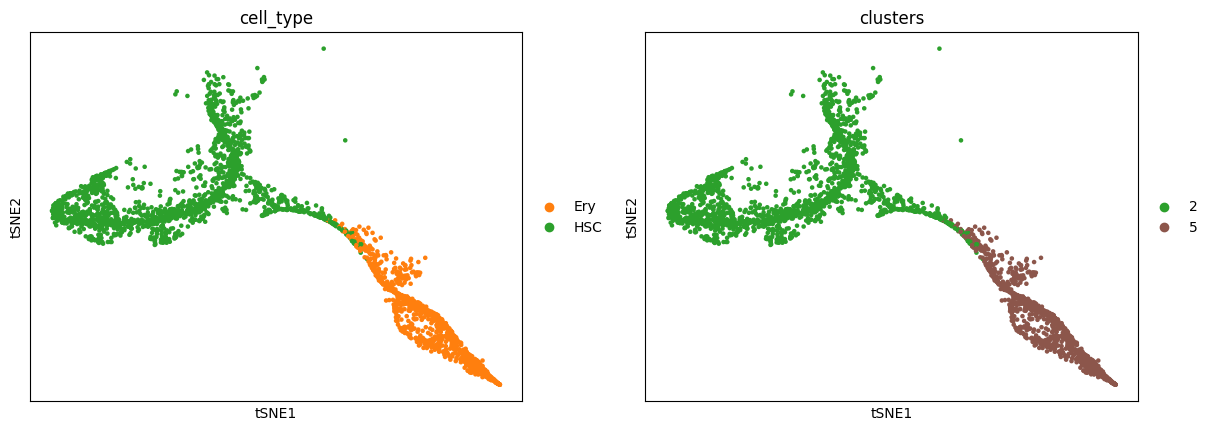

In [24]:
rep1_ery_clusters = ["0", "2", "8"]
rep2_ery_clusters = ["0", "2", "6"]
rep3_ery_clusters = ["2", "5"]

rep1_ery = split_dataset(rep1, rep1_ery_clusters)
rep1_ery = label_lineages(rep1_ery, "Ery", rep1_ery_clusters)
rep1_ery.uns["id"] = "Ery branch, Rep1"

rep2_ery = split_dataset(rep2, rep2_ery_clusters)
rep2_ery = label_lineages(rep2_ery, "Ery", rep2_ery_clusters)
rep2_ery.uns["id"] = "Ery branch, Rep2"

rep3_ery = split_dataset(rep3, rep3_ery_clusters)
rep3_ery = label_lineages(rep3_ery, "Ery", rep3_ery_clusters)
rep3_ery.uns["id"] = "Ery branch, Rep3"

sc.pl.tsne(rep1_ery, color = ["cell_type", "clusters"])
sc.pl.tsne(rep2_ery, color = ["cell_type", "clusters"])
sc.pl.tsne(rep3_ery, color = ["cell_type", "clusters"])

In [25]:
write_with_pc(rep1_mono, "data/rep1_mono")
write_with_pc(rep2_mono, "data/rep2_mono")
write_with_pc(rep3_mono, "data/rep3_mono")

write_with_pc(rep1_ery, "data/rep1_ery")
write_with_pc(rep2_ery, "data/rep2_ery")
write_with_pc(rep3_ery, "data/rep3_ery")